In [1]:
cd /content/drive/My Drive/Dava with ML

/content/drive/My Drive/Dava with ML


In [ ]:
!unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ls

 breast-cancer-wisconsin-data.zip   heart-disease-uci.zip
 Cancer.ipynb                       heart.ipynb
 cardiovaskular_dataset.zip         hepatiits_dataset.zip
 chronic-kidney-disease.zip         hepatities.ipynb
'covid pnemonia.ipynb'              hepatitisdata.csv
 data.csv                           indian_liver_patient.csv
 Dataset_spine.csv                  indian-liver-patient-records.zip
 dataset.zip                        kidney.ipynb
 degree_cancer_5.tflite             liver.ipynb
 degree_cancer_8.tflite             model_covid.h5
 degree_covid_mobilenet.tflite      model_covid.pkl
 degree_covid.tflite                new_model.csv
 degree_covid_vgg.tflite            parkinson_dataset.zip
 degree_diabeties.tflite            Parkinson.ipynb
 degree_heart.tflite                pd_speech_features.csv
 degree_kidney.tflite               pima-indians-diabetes-database.zip
 degree_liver.tflite                saved_model_cancer_5.pbtxt/
 degreeliver.tflite                 saved_mod

In [4]:
dataset=pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
dataset.isnull().values.any()

False

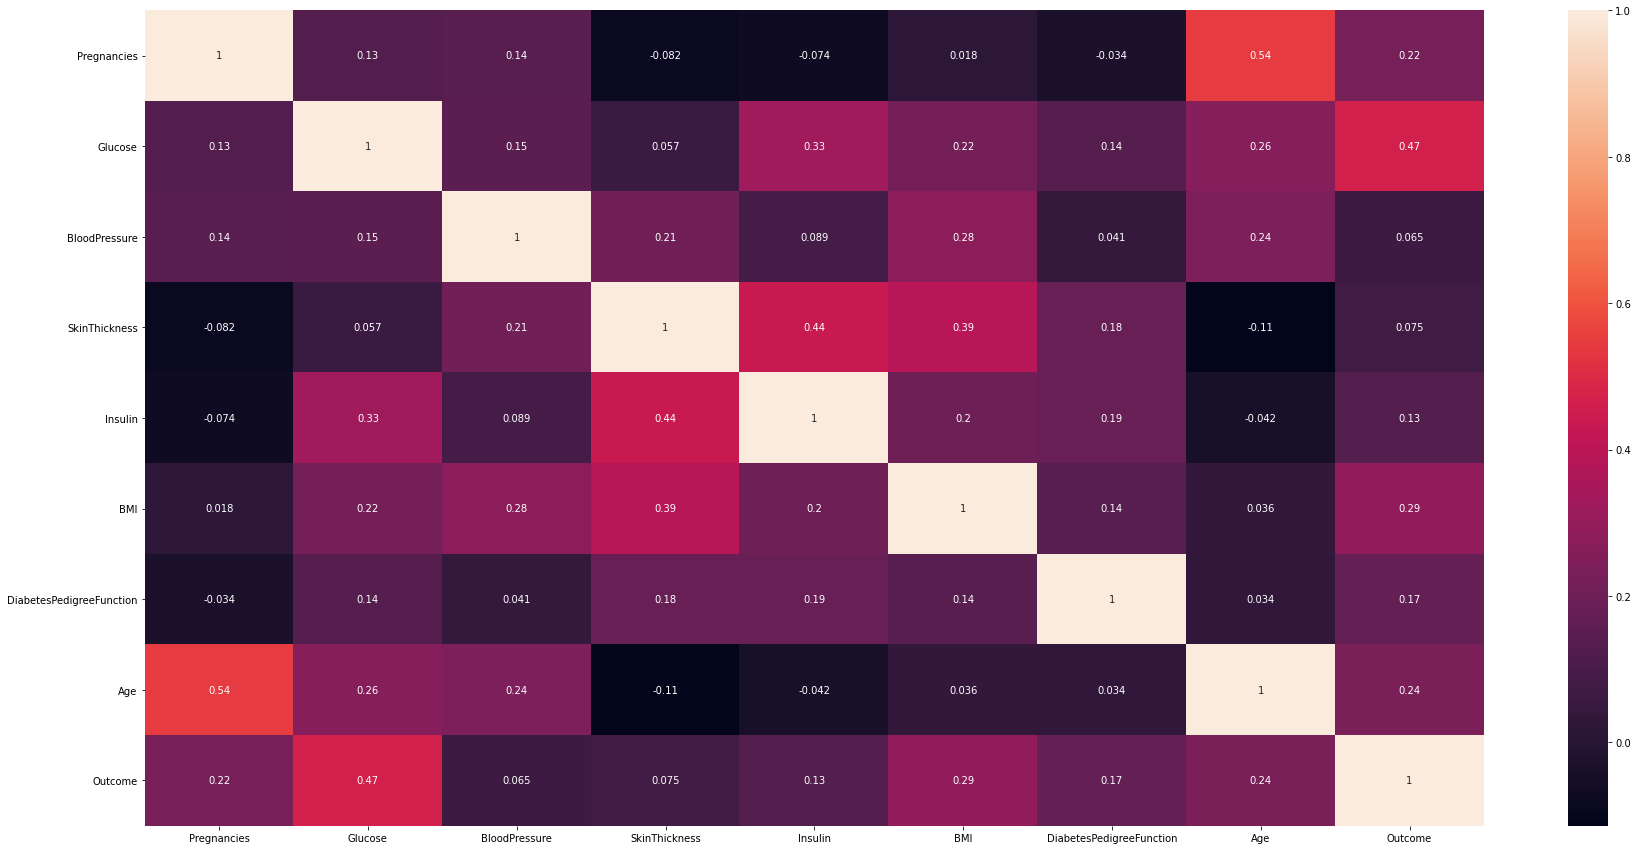

In [6]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

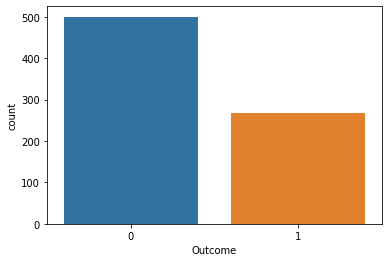

In [7]:
sns.countplot(x='Outcome',data=dataset)

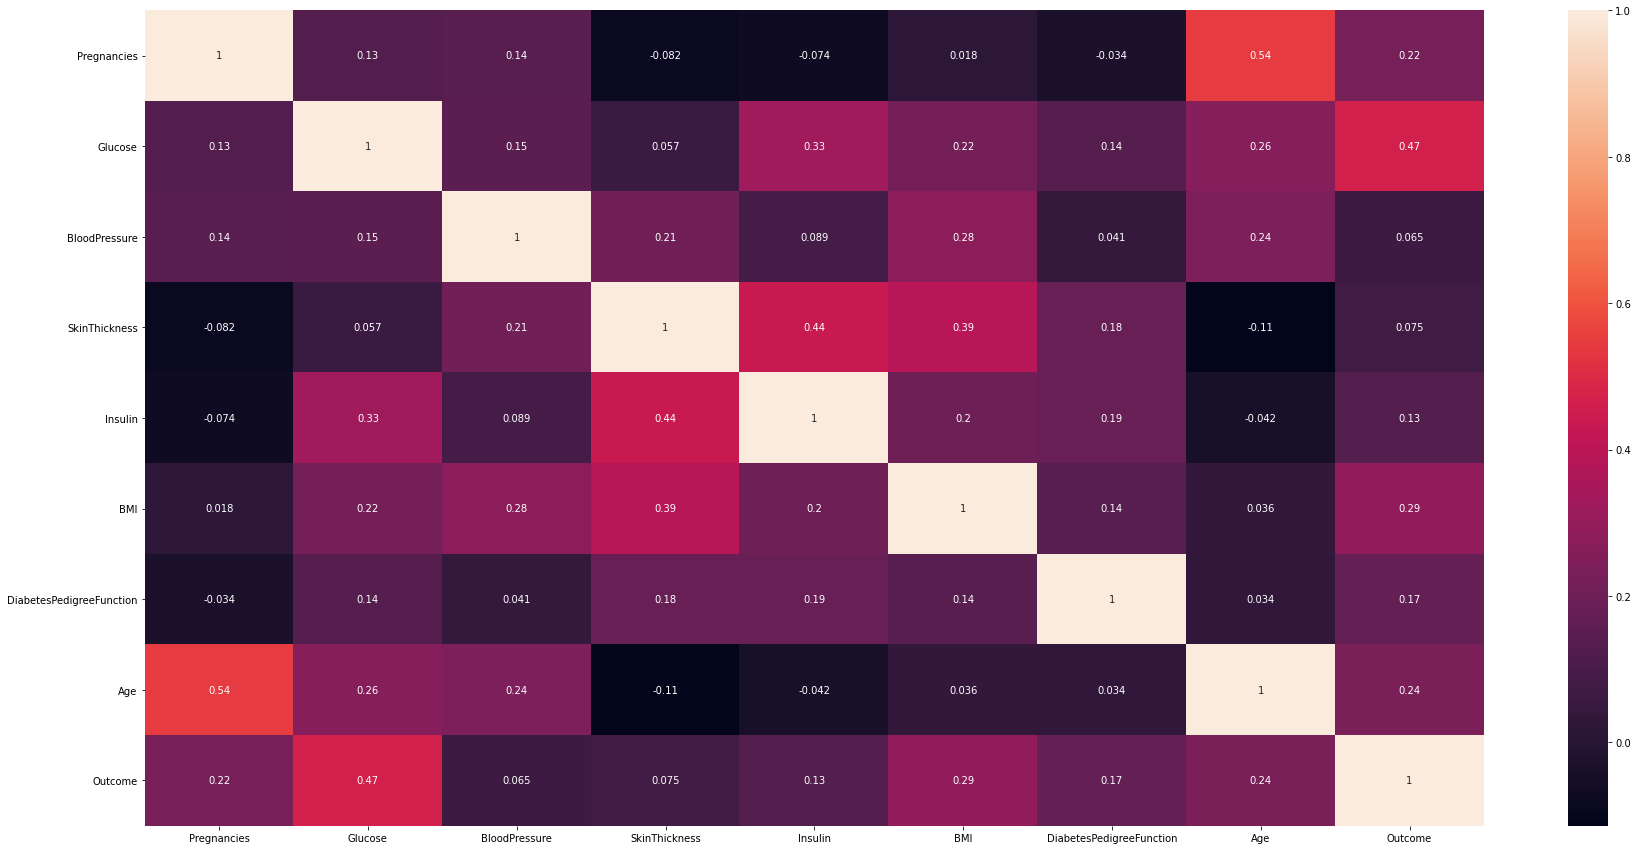

In [8]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

##Splitting Dataset

In [9]:
features=dataset.iloc[:,:-1]
labels=dataset.iloc[:,[-1]]

In [10]:
features=np.array(features)

In [11]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=42)

In [12]:
feature_train

array([[  2.   ,  84.   ,   0.   , ...,   0.   ,   0.304,  21.   ],
       [  9.   , 112.   ,  82.   , ...,  28.2  ,   1.282,  50.   ],
       [  1.   , 139.   ,  46.   , ...,  28.7  ,   0.654,  22.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

##Logistic Regression

In [ ]:
model=LogisticRegression(max_iter=300)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7467532467532467

In [ ]:
label_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
label_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[78 21]
 [18 37]]


##KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(knn,param_grid=param)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model.best_params_

{'n_neighbors': 8}

In [ ]:
model=KNeighborsClassifier(n_neighbors=8)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
label_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7467532467532467

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[81 18]
 [21 34]]


##Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param={'max_depth':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(dt,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [ ]:
model.best_params_

{'max_depth': 3}

In [ ]:
model=model.best_estimator_

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
label_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7597402597402597

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[83 16]
 [21 34]]


##SVM

In [ ]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7532467532467533

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[80 19]
 [19 36]]


In [ ]:
label_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
label_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


## Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param={'n_estimators':[50,100,150,200],'max_depth':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(rfc,param_grid=param)
model.fit(feature_train,label_train)

In [ ]:
model.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [ ]:
model=model.best_estimator_

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
label_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7402597402597403

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[76 23]
 [17 38]]


In [ ]:
label_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
label_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


#Nueral Network

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [14]:
from keras.utils.np_utils import to_categorical
label_train=to_categorical(label_train)
label_test=to_categorical(label_test)

In [15]:
label_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [16]:
feature_train.shape

(614, 8)

In [17]:
model=Sequential()
model.add(Dense(400,input_shape=[8],activation='relu'))


model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 802       
Total params: 4,402
Trainable params: 4,402
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(feature_train,label_train,epochs=500)

Epoch 1/500
20/20 [==============================] - 0s 4ms/step - loss: 1.5513 - accuracy: 0.5879
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.8583 - accuracy: 0.6124
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6840
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.6987
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6133 - accuracy: 0.6629
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6516 - accuracy: 0.6792
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6857
Epoch 8/500
20/20 [==============================] - 0s 3ms/step - loss: 0.7392 - accuracy: 0.6531
Epoch 9/500
20/20 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.7101
Epoch 10/500
20/20 [==============================] - 0s 3ms/step - loss: 0.7260 - accuracy: 0.6547
Epoch 11/

In [20]:
label_pred=model.predict(feature_test)

In [21]:
label_pred

array([[4.14662898e-01, 6.21711612e-01],
       [7.26877034e-01, 2.80529946e-01],
       [8.20176184e-01, 1.98775515e-01],
       [8.06028545e-01, 1.81894839e-01],
       [1.39375880e-01, 8.75913143e-01],
       [3.18161517e-01, 7.14812636e-01],
       [8.83321941e-01, 1.52103111e-01],
       [9.99978065e-01, 2.38636949e-05],
       [1.37913913e-01, 8.70656312e-01],
       [4.07733321e-02, 9.53999817e-01],
       [5.49400985e-01, 5.03576159e-01],
       [1.92122515e-02, 9.82767642e-01],
       [3.88476074e-01, 6.00953758e-01],
       [7.72078216e-01, 2.63593554e-01],
       [9.09018099e-01, 9.45861861e-02],
       [4.52814162e-01, 5.47833562e-01],
       [7.82795787e-01, 2.39659473e-01],
       [8.74355435e-01, 1.50683597e-01],
       [3.10773015e-01, 6.90500796e-01],
       [6.39552593e-01, 2.65471995e-01],
       [2.87528157e-01, 7.53490388e-01],
       [9.34864044e-01, 8.24827924e-02],
       [1.94653049e-01, 7.76978195e-01],
       [9.32394505e-01, 8.30340385e-02],
       [2.623948

In [22]:
label_pred=np.argmax(label_pred,axis=1)

In [23]:
label_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [24]:
label_test=np.argmax(label_test,axis=1)
label_train=np.argmax(label_train,axis=1)

In [25]:
m.accuracy_score(label_test,label_pred)

0.7077922077922078

In [26]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



In [27]:
print(m.confusion_matrix(label_test,label_pred))

[[73 26]
 [19 36]]


In [28]:
label_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [29]:
label_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [30]:
import tensorflow

#Save the model to saved_model.pbtxt

tensorflow.keras.models.save_model(model,'saved_model_liver.pbtxt')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model_liver.pbtxt/assets


In [ ]:
model.save(model)

In [ ]:
# We need to create a TFLite Converter Object from model we created

converter = tensorflow.lite.TFLiteConverter.from_keras_model(model=model)

In [ ]:
# Create a tflite model object from TFLite Converter

tfmodel = converter.convert()

# Save TFLite model into a .tflite file 

open("degree_diabeties.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmp04ma7b4i/assets


18900